<h2>Produce a 4-panel plot from a gridded data file produced by the windsyn analysis program

In [1]:
# Load the needed packages
from glob import glob
import os
import matplotlib.pyplot as plt

import awot
from awot.graph.common import create_basemap
from awot.graph import RadarHorizontalPlot, FlightLevel

%matplotlib inline

Set user specified variables

In [2]:
# Set the project name
Project="DYNAMO"

# Choose what file to process
yymmdd, modn = '111124', '0705'

# Set the data directory
fdir = "/Users/guy/data/dynamo/"

# Construct the full path name for windsyn NetCDF file
P3Radf = os.path.join(fdir, yymmdd+"I", modn+"_windsyn.nc")

# Construct the full path name for Flight level NetCDF file
FltLevf = os.path.join(fdir, yymmdd+"I", "20111124I1_DJ_AC.nc")
#str(glob(fDir+"20*"+yymmdd+"*_DJ*.nc")).strip('[]')

# Optional settings
start_time = "2011-11-24 07:05:00"
end_time = "2011-11-24 07:45:00"
corners = [78.5, -0.8, 80.1, 0.8]

dLon = 0.5
dLat = 0.5

figtitle = '24 Nov RCE'

Set up some characteristics for plotting. 
Use Cylindrical Equidistant Area map projection.
Set the spacing of the barbs, X-axis time step for labels, and whether to use Landmarks.

In [3]:
# Set map projection to use
proj = 'cea'

Wbarb_Spacing = 300 # Spacing of wind barbs along flight path (sec)

# Choose the X-axis time step (in seconds) where major labels will be
XlabStride = 60

# Should landmarks be plotted? [If yes, then modify the section below
Lmarks=False

Read in flight and radar data from the NOAA P-3 aircraft

In [4]:
# Get the airborne data
fl1 = awot.io.read_netcdf(fname=FltLevf, platform='p-3')
fl2 = awot.io.read_netcdf(fname=FltLevf, platform='p-3')
fl3 = awot.io.read_netcdf(fname=FltLevf, platform='p-3')
fl4 = awot.io.read_netcdf(fname=FltLevf, platform='p-3')
# Get the tail radar data
r1 = awot.io.read_windsyn_tdr_netcdf(fname=P3Radf, field_mapping=None)
r2 = awot.io.read_windsyn_tdr_netcdf(fname=P3Radf, field_mapping=None)
r3 = awot.io.read_windsyn_tdr_netcdf(fname=P3Radf, field_mapping=None)
r4 = awot.io.read_windsyn_tdr_netcdf(fname=P3Radf)

time_diff does not exist in file...
time_diff does not exist in file...
time_diff does not exist in file...
time_diff does not exist in file...


Create the figure and set up plotting instances.

Create basemaps to use for the horizontal plots.

Execute the plotting routines.

Closest level:  2.0
Closest level:  2.0
Closest level:  5.0
Closest level:  5.0


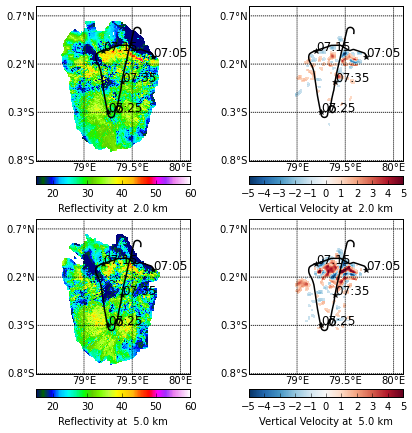

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 7))#, sharex='col', sharey='row')

bm1 = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1., 
                  dLat=dLat, dLon=dLon, ax=ax1)
bm2 = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1., 
                  dLat=dLat, dLon=dLon, ax=ax2)
bm3 = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1., 
                  dLat=dLat, dLon=dLon, ax=ax3)
bm4 = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1., 
                  dLat=dLat, dLon=dLon, ax=ax4)

# Create a RadarGrid
rgp1 = RadarHorizontalPlot(r1, basemap=bm1)
rgp2 = RadarHorizontalPlot(r2, basemap=bm2)
rgp3 = RadarHorizontalPlot(r3, basemap=bm3)
rgp4 = RadarHorizontalPlot(r4, basemap=bm4)

# Create a Flightlevel instance for the track
flp1 = FlightLevel(fl1, basemap=bm1)
flp2 = FlightLevel(fl2, basemap=bm2)
flp3 = FlightLevel(fl3, basemap=bm3)
flp4 = FlightLevel(fl4, basemap=bm4)

rgp1.plot_cappi('reflectivity', 2., vmin=15., vmax=60., title=' ',
              color_bar=True, cb_pad="10%", cb_loc='bottom', cb_tick_int=4,
              ax=ax1)
rgp2.plot_cappi('Wwind', 2., vmin=-5., vmax=5., title=' ',
              mask_procedure='inside', mask_tuple=('Wwind', -1., 1.),
              cmap='RdBu_r',
              color_bar=True, cb_pad="10%", cb_loc='bottom', 
              ax=ax2)
rgp3.plot_cappi('reflectivity', 5., vmin=15., vmax=60., title=' ',
              color_bar=True, cb_pad="10%", cb_loc='bottom', cb_tick_int=4,
              ax=ax3)
rgp4.plot_cappi('Wwind', 5., vmin=-5., vmax=5., title=' ',
              mask_procedure='inside', mask_tuple=('Wwind', -1., 1.),
              cmap='RdBu_r',
              color_bar=True, cb_pad="10%", cb_loc='bottom', 
              ax=ax4)

flp1.plot_trackmap(
              start_time=start_time, end_time=end_time,
#             color_by_altitude=True, track_cmap='spectral',
#              min_altitude=50., max_altitude= 8000.,
              addlegend=False, addtitle=False, ax=ax1)
flp2.plot_trackmap(
              start_time=start_time, end_time=end_time,
#              min_altitude=50., max_altitude= 8000.,
              addlegend=False, addtitle=False, ax=ax2)
flp3.plot_trackmap(
              start_time=start_time, end_time=end_time,
#              min_altitude=50., max_altitude= 8000.,
              addlegend=False, addtitle=False, ax=ax3)
flp4.plot_trackmap(
              start_time=start_time, end_time=end_time,
#              min_altitude=50., max_altitude= 8000.,
              addlegend=False, addtitle=False, ax=ax4)

#flp.draw_scale(location='lower_middle')
#flp.draw_barbs(barbspacing=Wbarb_Spacing)
        
flp1.time_stamps(labelspacing=600,
              start_time=start_time, end_time=end_time, ax=ax1)
flp1.time_stamps(labelspacing=600,
              start_time=start_time, end_time=end_time, ax=ax2)
flp1.time_stamps(labelspacing=600,
              start_time=start_time, end_time=end_time, ax=ax3)
flp1.time_stamps(labelspacing=600,
              start_time=start_time, end_time=end_time, ax=ax4)